In [7]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [26]:
#loading the data
df_train  = pd.read_csv("C://Users//user//Downloads//Train.csv")
df_test = pd.read_csv("C://Users//user//Downloads//Test.csv")

df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [4]:
df_test.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A


In [39]:
df_train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [6]:
df_train.shape

(8068, 11)

In [28]:
df_train['Ever_Married'].fillna('Yes',inplace=True)

In [29]:
df_train['Graduated'].fillna('Yes',inplace=True)

In [34]:
columns_to_impute = ['Profession', 'Var_1']
imputer = SimpleImputer(strategy='most_frequent')
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])

In [86]:
columns_to_impute2 = ['Profession', 'Var_1']
imputer = SimpleImputer(strategy='most_frequent')
df_test[columns_to_impute2] = imputer.fit_transform(df_test[columns_to_impute2])

In [35]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [37]:
columns_to_impute1 = ['Work_Experience', 'Family_Size']

In [38]:
imputer1 = SimpleImputer(strategy='mean')
df_train[columns_to_impute1] = imputer1.fit_transform(df_train[columns_to_impute1])

In [87]:
columns_to_impute3 = ['Work_Experience', 'Family_Size']
df_test[columns_to_impute3] = imputer1.fit_transform(df_test[columns_to_impute3])

In [41]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train['Ever_Married']=le.fit_transform(df_train['Ever_Married'])
df_train['Graduated']=le.fit_transform(df_train['Graduated'])

In [72]:
df_train['Gender']=le.fit_transform(df_train['Gender'])

In [69]:
df_train['Profession']=le.fit_transform(df_train['Profession'])
df_train['Var_1']=le.fit_transform(df_train['Var_1'])

In [73]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,-0.508763,0,0.767001,3
1,462643,0,1,38,1,2,0.000000,1,0.099972,3


In [74]:
df_train['Spending_Score'].value_counts()

Spending_Score
0    4878
1    1974
2    1216
Name: count, dtype: int64

In [75]:
df_train['Spending_Score'] = df_train['Spending_Score'].map({'Low':0, 'Average':1,'High':2}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [78]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,-0.508763,0,0.767001,3
1,462643,0,1,38,1,2,0.000000,1,0.099972,3


In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [77]:
y_train= df_train.pop('Segmentation')

KeyError: 'Segmentation'

In [67]:
y_test=df_test.pop('Segmentation')

In [54]:
y_train

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [59]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,Healthcare,1.000000,0,4.0,Cat_4
1,462643,0,1,38,1,Engineer,2.641663,1,3.0,Cat_4


In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_train['Work_Experience'] = ss.fit_transform(df_train['Work_Experience'].values.reshape(-1, 1))

In [79]:
df_train['Age'] = ss.fit_transform(df_train['Age'].values.reshape(-1, 1))

In [80]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,-1.284623,0,5,-0.508763,0,0.767001,3
1,462643,0,1,-0.327151,1,2,0.000000,1,0.099972,3


In [63]:
df_train['Family_Size'] = ss.fit_transform(df_train['Family_Size'].values.reshape(-1, 1))

In [81]:
df_train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,-1.284623,0,5,-0.508763,0,0.767001,3
1,462643,0,1,-0.327151,1,2,0.000000,1,0.099972,3


In [83]:
df_test.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_test['Ever_Married']=le.fit_transform(df_test['Ever_Married'])
df_test['Graduated']=le.fit_transform(df_test['Graduated'])
df_test['Gender']=le.fit_transform(df_test['Gender'])
df_test['Profession']=le.fit_transform(df_test['Profession'])
df_test['Var_1']=le.fit_transform(df_test['Var_1'])
df_test['Spending_Score'] = df_test['Spending_Score'].map({'Low':0, 'Average':1,'High':2}).astype(int)
df_test['Work_Experience'] = ss.fit_transform(df_test['Work_Experience'].values.reshape(-1, 1))
df_test['Age'] = ss.fit_transform(df_test['Age'].values.reshape(-1, 1))

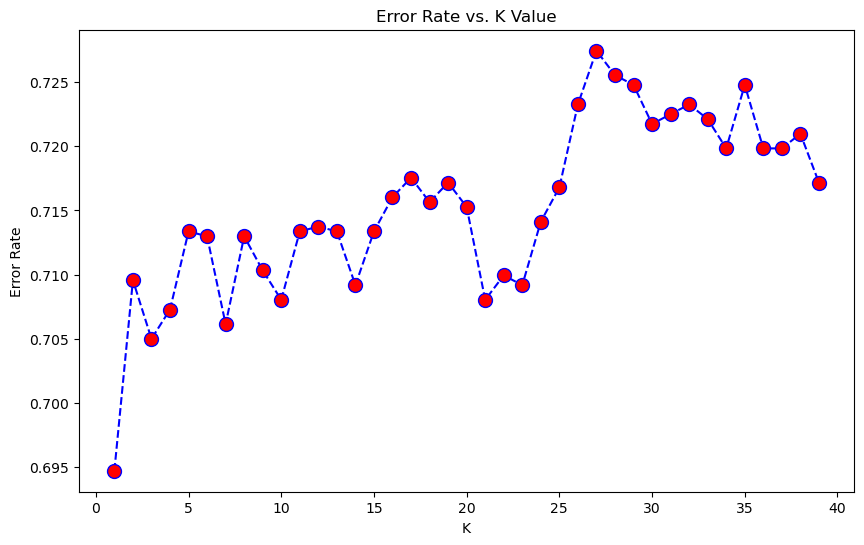

Minimum error:- 0.6947087933003426 at K = 1


In [88]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(df_train,y_train)
 pred_i = knn.predict(df_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [89]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(df_train, y_train)
y_pred = knn.predict(df_test)
accuracy_score(y_test, y_pred)

0.3052912066996574

In [90]:
confusion_matrix(y_test, y_pred)

array([[227, 191, 198, 230],
       [128, 144, 142, 136],
       [105, 133, 133, 101],
       [171, 129, 161, 298]], dtype=int64)